In [1]:
import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

from collections import namedtuple
import os
import pickle
import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML, display
import skimage.color
import skimage.transform

from digits.data import Env, Loader
from digits.explore import img_tag, img_show
from digits.images import *

%matplotlib inline

env = Env('..')
env.assert_ready()
loader = Loader.from_env(env)
loader.assert_ready()
print("ready")

ready


In [2]:
orig, proc = loader.load_data('crop-test-small', 42)

In [3]:
proc.X.shape

(100, 32, 32, 3)


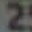

In [4]:
img_show(proc.X[0])

In [5]:
g = skimage.color.rgb2gray(proc.X[2])


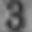

In [6]:
img_show(g)


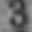


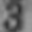


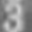


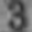


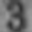


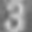


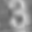


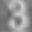


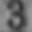


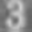

In [7]:
img_show(img_map(lambda x: rando(x), np.tile(g, (10, 1, 1))))

In [8]:
def squish(z):
    z = z - np.min(z)
    m = np.max(z)
    if m == 0.0:
        return z
    else:
        return z / m

In [20]:
import skimage.morphology
import skimage.filters.rank

def lcn(img, s):
    selem = skimage.morphology.disk(s, dtype=img.dtype)
    return skimage.filters.rank.equalize(img, selem=selem)


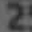


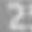


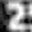


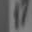


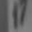


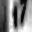


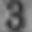


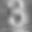


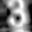


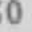


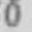


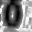


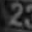


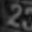


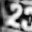


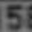


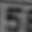


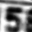


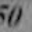


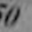


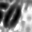


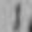


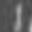


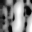


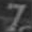


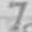


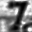


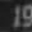


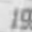


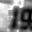

In [47]:
import skimage.feature
import skimage.exposure
for x in proc.X[:10]:
    gray = skimage.color.rgb2gray(x)
    rand = rando(gray)
    alt = skimage.exposure.equalize_hist(rand)
    img_show(gray)
    img_show(rand)
    img_show(alt)

# 